## Load Data

In [1]:
!ls

LICENSE
Mod4_Project_Tino.ipynb
Mod4_Project_Tino_MaryJo.ipynb
README.md
column_names.md
kc_clean_with_employers.csv
kc_housing_data_for_feat_engineering_lab.csv


In [2]:
#import needed programs and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 300)

In [214]:
#import the data file
df_orig = pd.read_csv("kc_housing_data_for_feat_engineering_lab.csv")

In [215]:
#explore the number of rows and columns
df_orig.shape

(21600, 25)

In [144]:
#review the first five rows of content
df_orig.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166


# Look at Data - Feature Exploration

In [4]:
# generate summary calculations to understand the range of data
df_orig.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
count,2.160000e+04,2.160000e+04,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,4.579615e+09,5.373816e+05,3.368519,2.112755,2076.363102,1.509984e+04,1.494074,0.007315,0.233102,3.409491,7.654398,1785.811019,290.552083,1970.997083,84.175417,98077.958565,47.560010,-122.213881,1985.546713,12763.966296,46.002917,2014.323009,2.676991,13.046450
std,2.876428e+09,3.478161e+05,0.907209,0.764996,905.418691,4.143112e+04,0.539977,0.085215,0.763639,0.650764,1.170914,820.347147,439.822696,29.371050,401.161832,53.504611,0.138589,0.140865,684.040784,27310.813034,29.371050,0.467637,0.467637,0.523683
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2.000000,2014.000000,2.000000,11.225243
25%,2.123049e+09,3.213818e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470775,-122.328000,1490.000000,5100.000000,20.000000,2014.000000,2.000000,12.680385
50%,3.904926e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.615500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571750,-122.231000,1840.000000,7620.000000,42.000000,2014.000000,3.000000,13.017003
75%,7.308675e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.066675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000,66.000000,2015.000000,3.000000,13.377006
max,9.900000e+09,3.850000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,117.000000,2015.000000,3.000000,15.163584


In [216]:
#look for any missing data
total = df_orig.isnull().sum().sort_values(ascending=False)
percent = (df_orig.isnull().sum()/df_orig.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
price_log,0,0.0
grade,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0


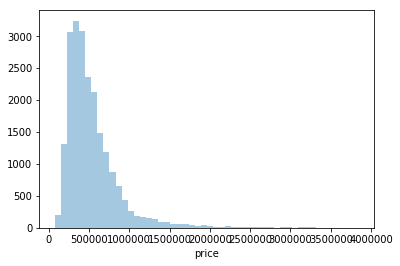

In [7]:
# Explore some of the data with visual inspection - histogram of price
import seaborn as sns
sns.distplot(df_orig.price, bins=50, kde=False);

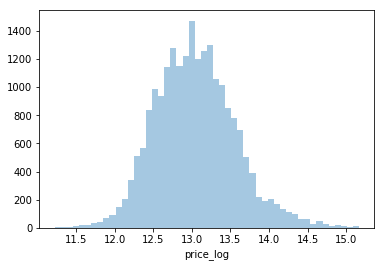

In [38]:
#explore data visually - histogram of price_log
sns.distplot(df_orig.price_log, bins=50, kde=False);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f7f9240>],
      dtype=object)

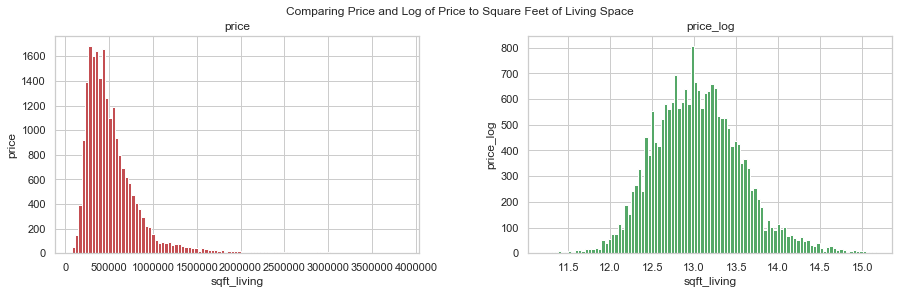

In [217]:
# Enable visual inspection of the data side by side, to choose which of the price variables to choose as the dependent
fig, axes = plt.subplots(1, 2,figsize = (15,4))

axes[0].set_title('sqft_living')
axes[0].set_xlabel('sqft_living')
axes[0].set_ylabel('price')
axes[1].set_title('sqft_living')
axes[1].set_xlabel('sqft_living')
axes[1].set_ylabel('price_log')
fig.suptitle('Comparing Price and Log of Price to Square Feet of Living Space', fontsize=12)

df_orig.hist('price', bins=100, ax=axes[0], color='r')
df_orig.hist('price_log', bins=100, ax=axes[1], color='g')


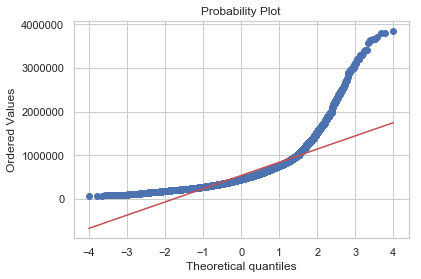

In [218]:
#use probability plot to verify fit for a regression
import scipy.stats as stats
res = stats.probplot(df_orig['price'], plot=plt)

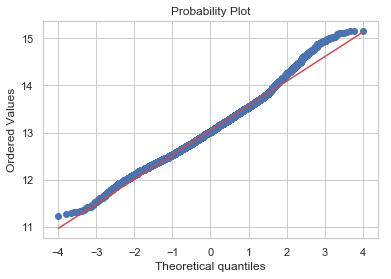

In [219]:
res = stats.probplot(df_orig['price_log'], plot=plt)

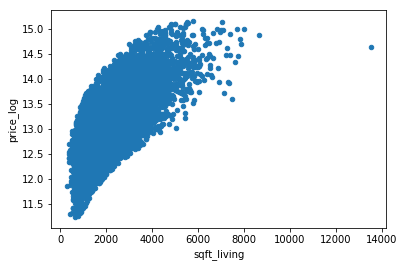

In [48]:
#explore other variables
var = 'sqft_living'
data = pd.concat([df_orig['price_log'], df_orig[var]], axis=1)
data.plot.scatter(x=var, y='price_log');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


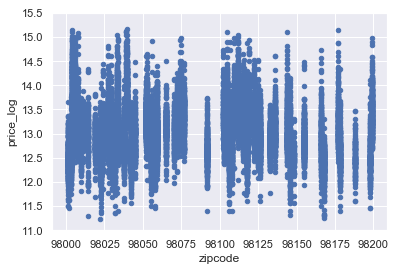

In [118]:
var = 'zipcode'
data = pd.concat([df_orig['price_log'], df_orig[var]], axis=1)
data.plot.scatter(x=var, y='price_log', ylim=(11,15.5));

In [60]:
# use boxplots to understand data range, median and quantiles
def  draw_boxplots(var):
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sns.boxplot(x=var, y="price", data=df_orig)
    fig.axis(ymin=0, ymax=3500000);

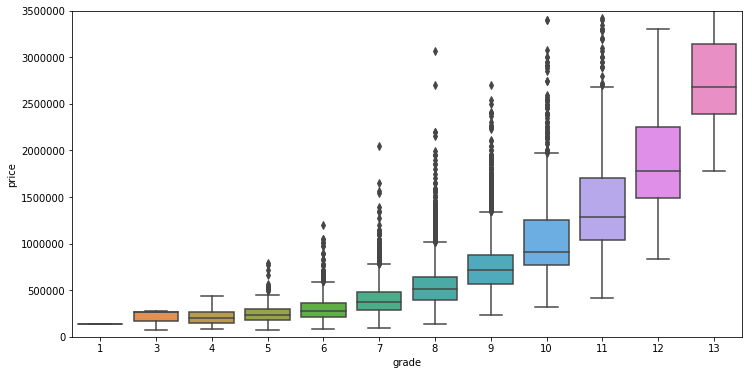

In [61]:
# use boxplots to understand data range, median and quantiles for grade
draw_boxplots('grade')

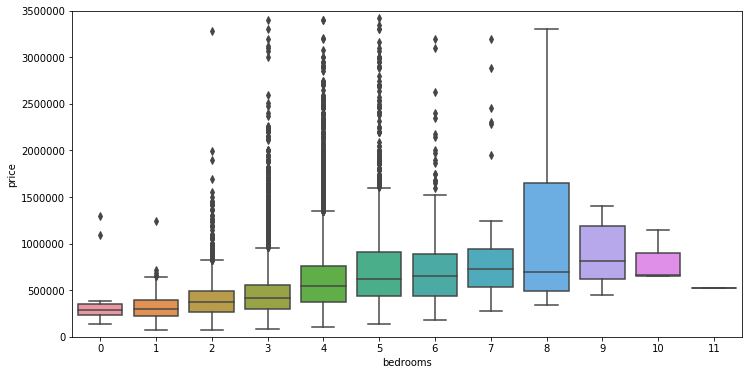

In [59]:
# use boxplots to understand data range, median and quantiles for bedrooms
draw_boxplots('bedrooms')

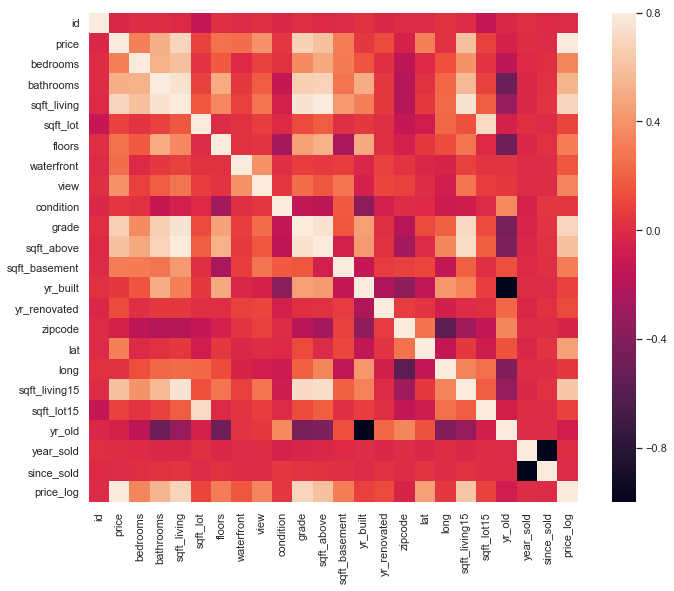

In [72]:
#use heatmap correlation matrix to view dependencies and correlation between variables
corrmat = df_orig.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

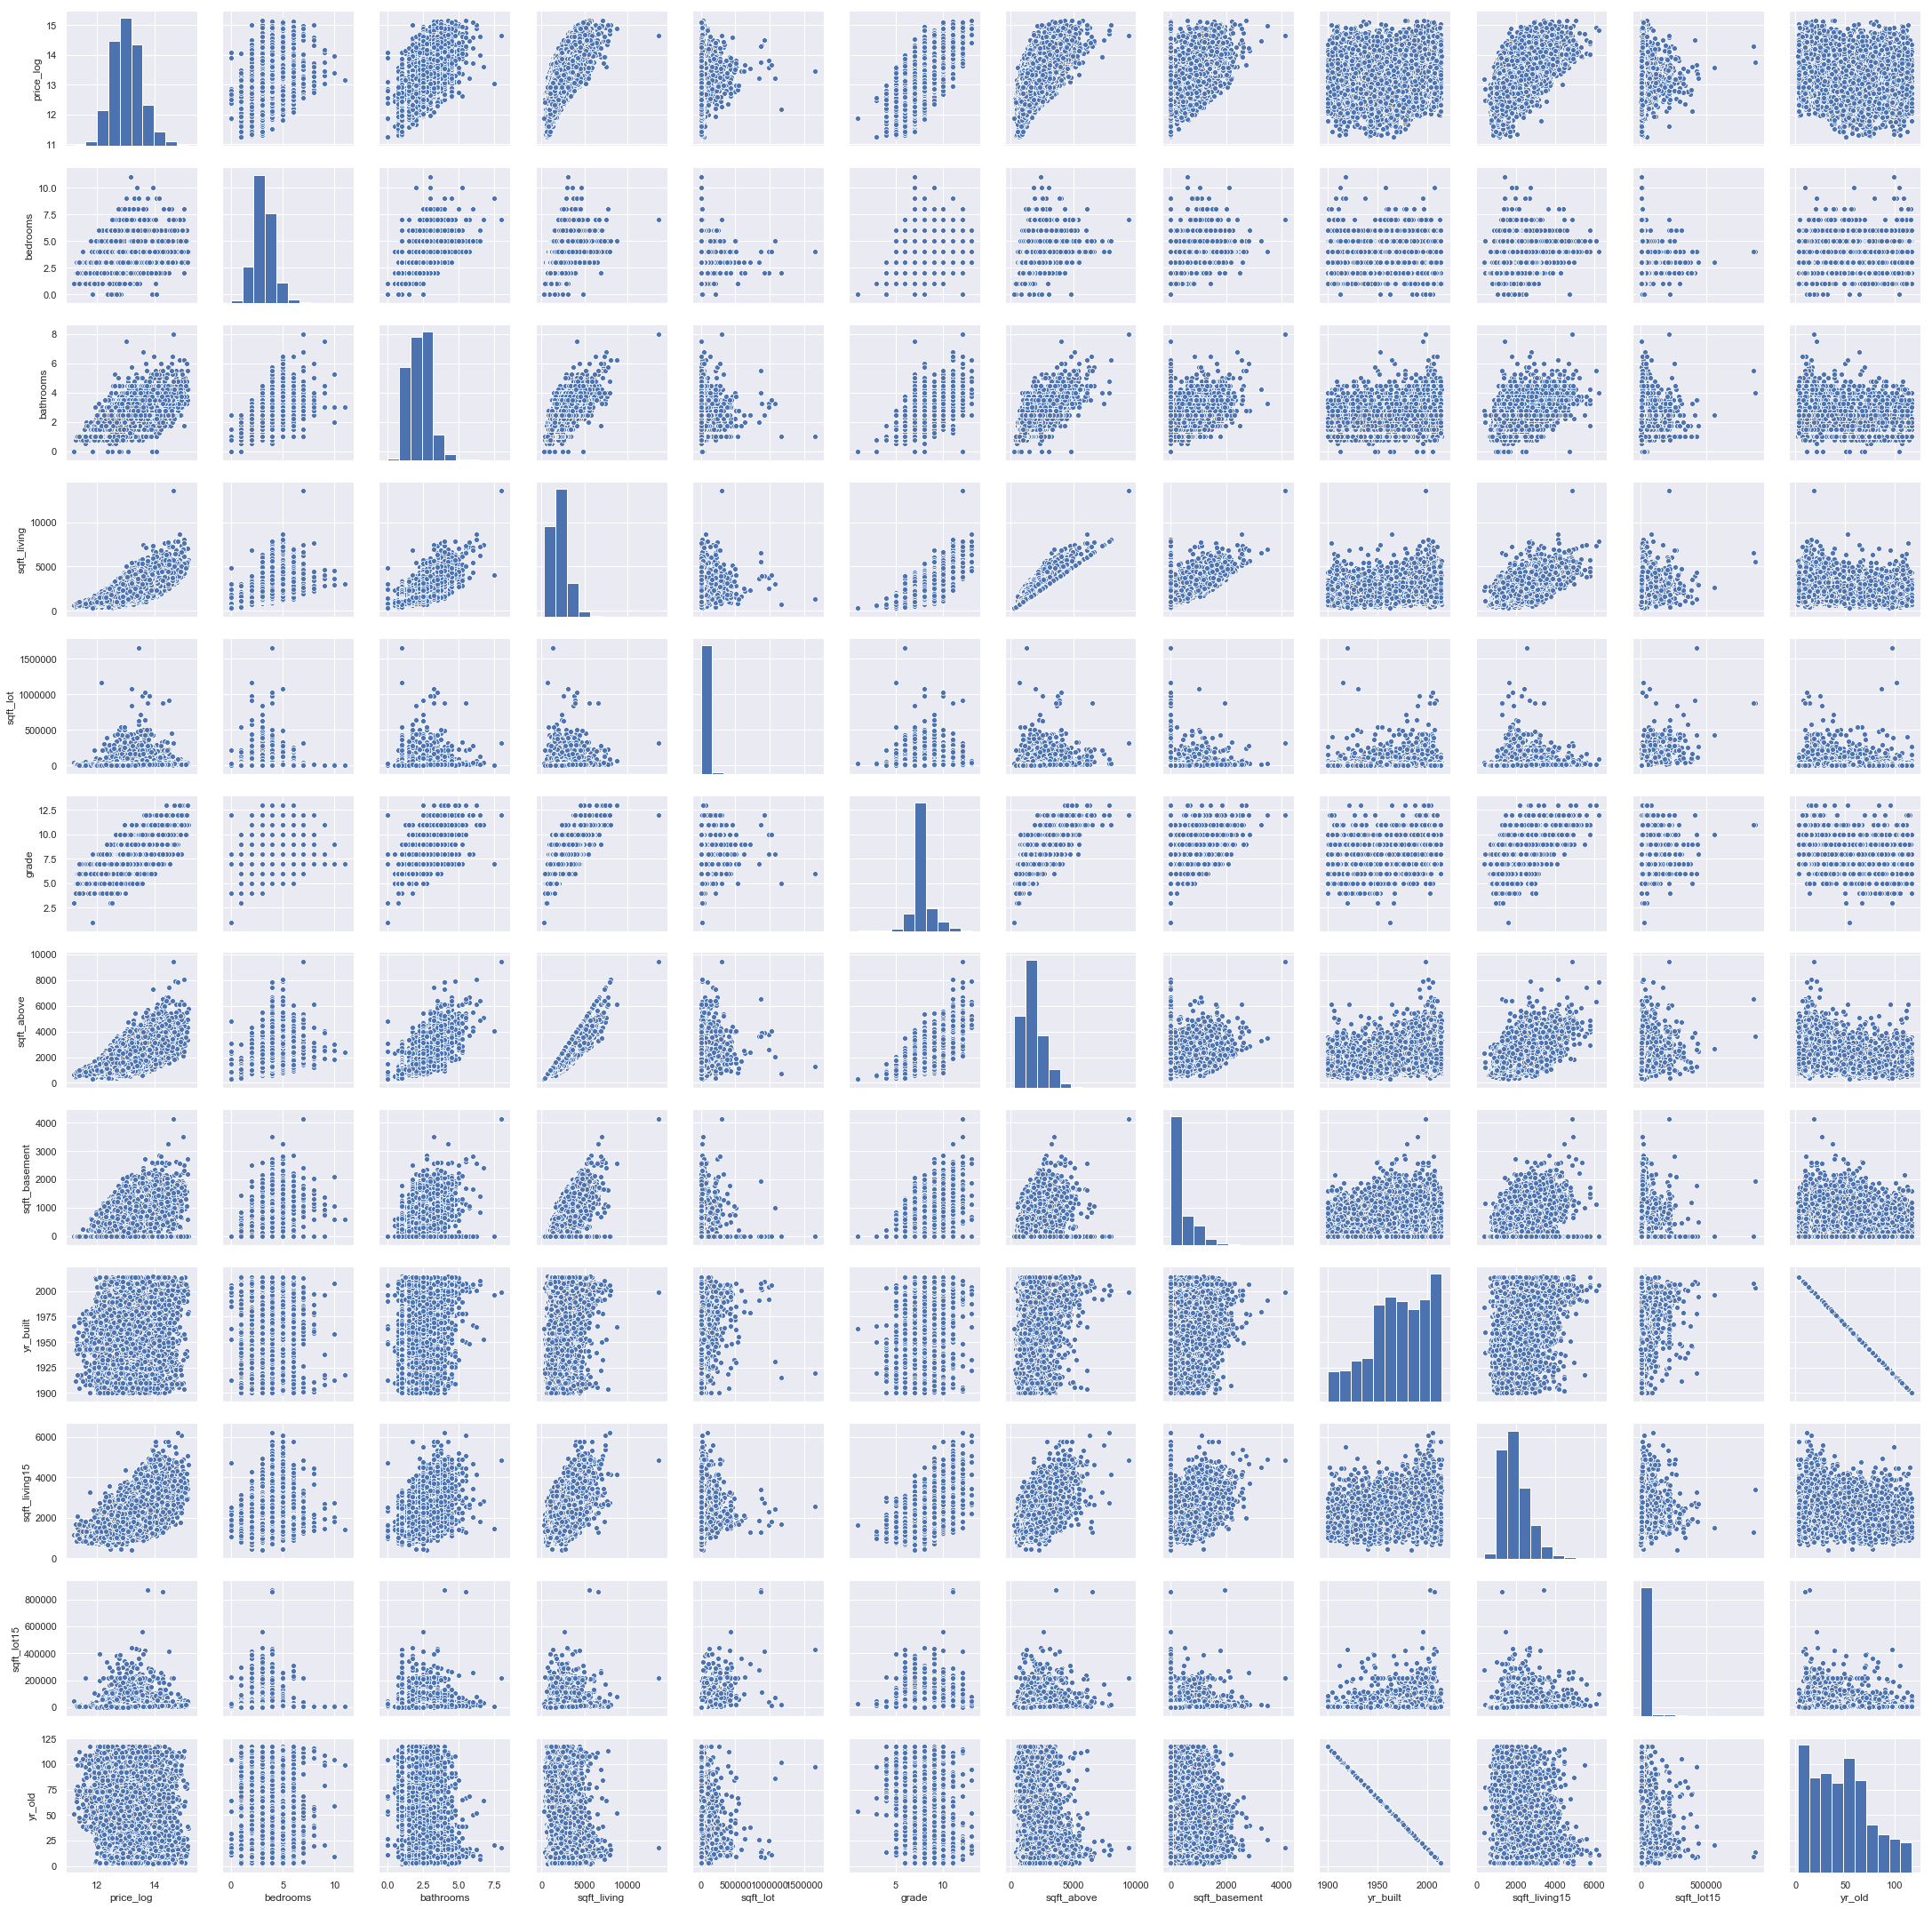

In [73]:
#use pairplot to look at selected variables with pairwise scatterplot. Looking for non-linear shapes to engineer.
sns.set()
cols = ['price_log','bedrooms','bathrooms','sqft_living','sqft_lot','grade','sqft_above','sqft_basement','yr_built','sqft_living15','sqft_lot15','yr_old']
sns.pairplot(df_orig[cols], height = 2.5)
plt.show();

## Feature Engineering

In [220]:
# create a copy for engineering purposes, retaining original for reversion if needed
df = df_orig.copy()

### Distance to biggest Employers
We assume housing prices are affected by the distance to the biggest employers in the area. The three biggest Employers are:
* Boeing
* Microsoft
* Amazon <br>
therefore three Columns are created estimating the distance with log lang data

In [6]:
#From Google Maps, retrieved Lat and Long Data of top Employers in the area
employers_dict = { "boeing": {"lat":47.6213723 , "long":-122.2890233 },
                  "microsoft":{"lat":47.6423318 , "long":-122.1456849},
                  "amazon":{"lat":47.6222917 , "long":-122.3386826 }}
                     

In [7]:
# Distance estimation using geometric distance
def get_distance(lat,long,t_lat,t_long):
    dx = lat-t_lat
    dy = long-t_long
    return (dx**2+dy**2)**0.5


def get_emp_distance(lat,long,employer):
    t_lat = employers_dict[employer]["lat"]
    t_long = employers_dict[employer]["long"]
    d = get_distance(lat,long,t_lat,t_long)
    return d

In [8]:
# Create Distance Features for Boeing, Amazon , Microsoft
#for emp in employers_dict.keys():
#    print(emp)
#    df[emp] = [get_emp_distance(df.iloc[i]["lat"],df.iloc[i]["long"],emp) for i in range(len(df))]

In [9]:
#for purposes of time savings, write results to a csv, and for future runs use the csv to call up the data
#df.to_csv("kc_clean_with_employers.csv", index = False)

In [320]:
#recalling the csv created earlier, with new features of Boeing, Amazon and Microsoft
df = pd.read_csv("kc_clean_with_employers.csv")
len(df)

21600

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


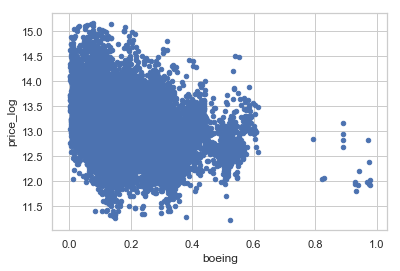

In [322]:
#view new variables
var = 'boeing'
data = pd.concat([df['price_log'], df[var]], axis=1)
data.plot.scatter(x=var, y='price_log');

## Creating a price/sqft/zipcode feature

In [254]:
#explore the number of zipcodes in the dataset/region
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [325]:
#to create a price/sqft by zipcode feature, perform calculations to create the price/sqft and then get the mean per zipcode
df['price_sqft'] = df['price']/ df['sqft_living']
grouped = df.groupby('zipcode')
grouped_psqft = grouped['price_sqft'].agg(np.mean)

In [326]:
len(grouped_psqft)

70

In [327]:
#like a lookup table, use merge to enter the avg_price/sqft by zipcode to each entry in the dataframe
df = df.merge(grouped_psqft, left_on=['zipcode'], right_on=['zipcode'])

In [328]:
#clean up artifacts of the process, including renaming
df.rename(columns={'price_sqft_y':'price_sqft_mean_zip'}, inplace=True)
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,boeing,microsoft,amazon,price_sqft_x,price_sqft_mean_zip
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982,0.114732,0.172008,0.137889,188.050847,189.172528
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780,72,2014,3,12.232836,0.127265,0.174560,0.151523,233.437500,189.172528
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712,50,2014,3,13.005830,0.120963,0.165580,0.147571,211.904762,189.172528
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,56,2014,3,12.371587,0.120956,0.175293,0.143840,181.538462,189.172528
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,1931,0,98178,47.5048,-122.272,1650,8775,86,2015,2,12.043554,0.117809,0.186736,0.135096,197.674419,189.172528


In [329]:
#clean up artifacts of the process, including dropping unneeded column

df = df.drop(['price_sqft_x'], axis=1)

In [263]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,boeing,microsoft,amazon,price_sqft_mean_zip
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982,0.114732,0.172008,0.137889,189.172528
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780,72,2014,3,12.232836,0.127265,0.174560,0.151523,189.172528
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712,50,2014,3,13.005830,0.120963,0.165580,0.147571,189.172528
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,56,2014,3,12.371587,0.120956,0.175293,0.143840,189.172528
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,1931,0,98178,47.5048,-122.272,1650,8775,86,2015,2,12.043554,0.117809,0.186736,0.135096,189.172528


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


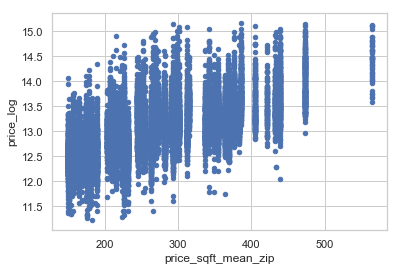

In [330]:
#view new variables
var = 'price_sqft_mean_zip'
data = pd.concat([df['price_log'], df[var]], axis=1)
data.plot.scatter(x=var, y='price_log');

## Normalization

In [264]:
#make zipcode categorical
df["zipcode"] = df.zipcode.astype("str")

In [265]:
#make yr_renovated binary since there are 95% data missing
df["yr_renovated"] = df["yr_renovated"].apply(lambda x: 1 if x>0 else 0)
df = df.rename(columns = {"yr_renovated":"renovated"})

In [266]:
#determined that sqft_basement is sqft_living-sqft_above, so filled in fields where missing by applying formula to all
df["sqft_basement"] = df["sqft_living"]-df["sqft_above"]
df["sqft_basement"] = df["sqft_basement"].apply(lambda x: 0.1 if x == 0 else x)

In [85]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,boeing,microsoft,amazon
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.1,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982,0.114732,0.172008,0.137889
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614,0.104040,0.190333,0.100652
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.1,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712,0.129295,0.129450,0.156634
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329,0.144658,0.275563,0.115113
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.1,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166,0.244066,0.103872,0.293734


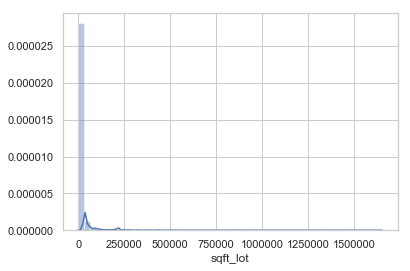

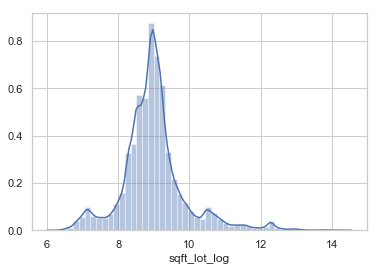

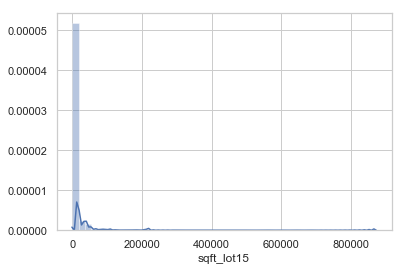

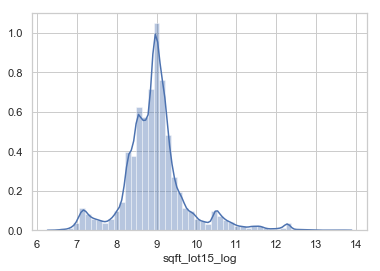

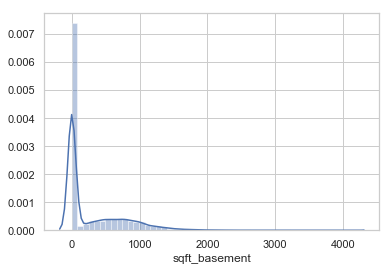

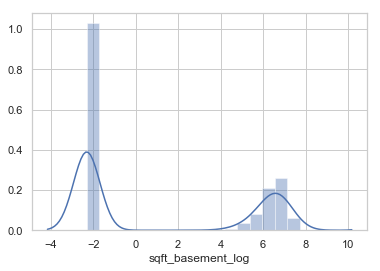

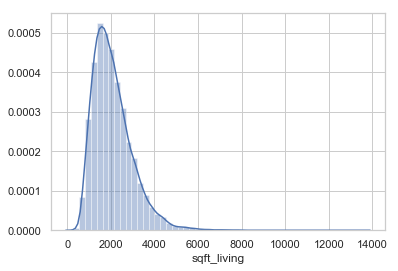

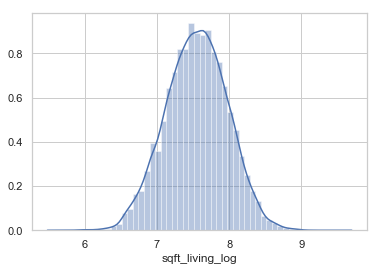

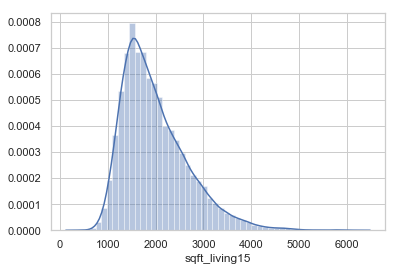

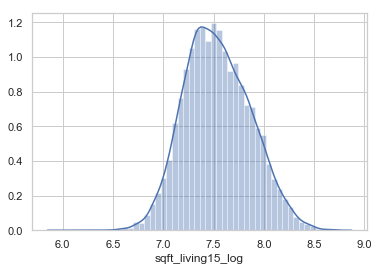

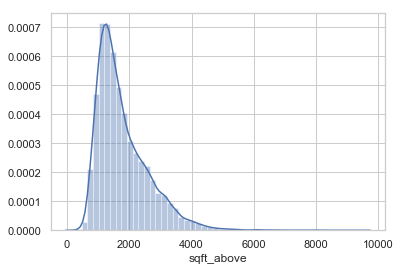

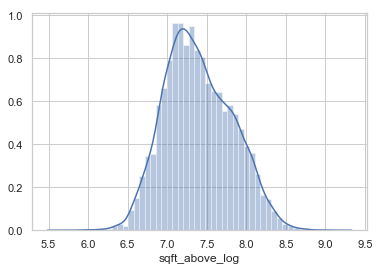

In [267]:
# log transform for fields selected by visual inspection
import seaborn as sns
logcols = ['sqft_lot','sqft_lot15', 'sqft_basement','sqft_living','sqft_living15', 'sqft_above']
for col in logcols:
    sns.distplot(df[col])
    plt.show()
    df[col+"_log"] = np.log(df[col])
    sns.distplot(df[col+"_log"])
    plt.show()
    df.drop(col, axis = 1 , inplace = True)

## Train Test Split

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [269]:
# Train-Test-Split
X = df.drop(["price", "price_log", "id" ,"date","year_sold"], axis = 1)
y = df.price_log
X_train, X_test ,y_train, y_test = train_test_split(X,y, random_state = 34)

In [317]:
#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (16200, 21) Target:  (16200,)
Test set - Features:  (5400, 21) Target:  (5400,)


In [318]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

## Basemodel

In [272]:
# Next step: fit a model, instantiate a linear regression object
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
#fit the linear regression to the data
basemodel = LinearRegression().fit(X_train,y_train)
base_y_hat = basemodel.predict(X_train)
base_r2 =  r2_score(base_y_hat , y_train)
print(f"base_model r^2 Train: {base_r2}")

base_model r^2 Train: 0.8679199790550747


In [273]:
#view intercept and coefficient

print(basemodel.intercept_)
print(basemodel.coef_)

13.04528938845532
[-0.01555645  0.02949673 -0.01278194  0.03943128  0.04523125  0.03594436
  0.10962122 -0.00260497  0.01454611 -0.00841619  0.02364838  0.08953903
  0.00260497 -0.02336621  0.12976665 -0.02133388 -0.22092462  0.24846284
  0.06336826 -0.02179501  0.01812414  0.08764303  0.05367814  0.09724636]


In [274]:
# generate statistics
train_mae_base = metrics.mean_absolute_error(y_train, base_y_hat)
train_mse_base = metrics.mean_squared_error(y_train, base_y_hat)
train_rmse_base = np.sqrt(metrics.mean_squared_error(y_train, base_y_hat))

print('Mean Absolute Error:', train_mae_base )
print('Mean Squared Error:',  train_mse_base)
print('Root Mean Squared Error:', train_rmse_base)

Mean Absolute Error: 0.1315031238916741
Mean Squared Error: 0.031495525754781435
Root Mean Squared Error: 0.17746978828741933


In [275]:
#price_std = target.std()
price_std = y_train.std()
print('Mean Absolute Error:', train_mae_base/price_std )
print('Root Mean Squared Error:' , train_rmse_base/price_std)

Mean Absolute Error: 0.2530918938105112
Root Mean Squared Error: 0.34155967921197977


In [276]:
# predict the test
base_y_hat = basemodel.predict(X_test)

Text(0, 0.5, 'Predictions')

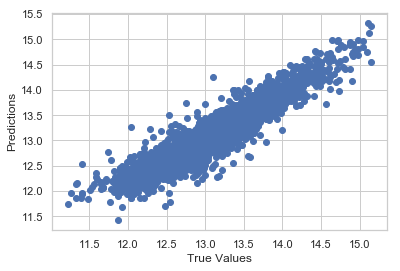

In [277]:
## The line / model
plt.scatter(y_test, base_y_hat)
plt.xlabel("True Values")
plt.ylabel("Predictions")

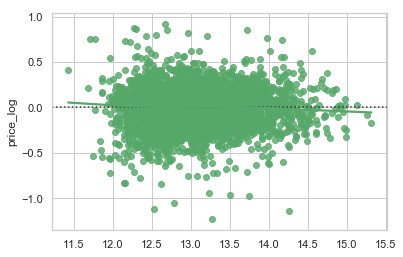

In [278]:
#view the residuals to understand how well the data fit the model
sns.residplot(base_y_hat, y_test, lowess=True, color="g")

In [279]:
#calculate model r^2 of test data
print(f"base_model r^2 Test: {r2_score(basemodel.predict(X_test),y_test)}")

base_model r^2 Test: 0.8668484498605005


In [280]:
# generate statistics of test data
test_mae_base = metrics.mean_absolute_error(y_test, base_y_hat)
test_rmse_base = np.sqrt(metrics.mean_squared_error(y_test, base_y_hat))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, base_y_hat)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, base_y_hat)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, base_y_hat))))

Mean Absolute Error:0.13588414717215874
Mean Squared Error:0.034519261122563656
Root Mean Squared Error:0.185793598174328


In [281]:
# Find root mean squared error and standard deviation
RMSE = np.sqrt(metrics.mean_squared_error(y_test, basemodel.predict(X_test)))
RMSE/y_train.std()


0.3575797458510945

In [282]:
print('Mean Absolute Error  Z:', test_mae_base/price_std )
print('Root Mean Squared Error Z:' , test_rmse_base/price_std)

Mean Absolute Error  Z: 0.2615236439170651
Root Mean Squared Error Z: 0.3575797458510945


In [283]:
#print results of Base Model
print('Training: ', round(train_rmse_base,5), "vs. Testing: ", round(test_rmse_base,5))

Training:  0.17747 vs. Testing:  0.18579


## Feature Selection

In [284]:
import statsmodels.api as sm

model = sm.OLS(list(y_train),sm.add_constant(X_train)).fit()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     3291.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:41:34   Log-Likelihood:                 1188.6
No. Observations:               16200   AIC:                            -2331.
Df Residuals:                   16177   BIC:                            -2154.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0440      0.002   7378.366      0.000      13.041      13.047
bedrooms             -0.0240      0.002     -9.946      0.000      -0.029      -0.019
bathrooms             0.0360      0.003     11.195      0.000       0.030       0.042
floors               -0.0007      0.003     -0.229      0.819      -0.006       0.005
waterfront            0.0444      0.002     22.862      0.000       0.041       0.048
view                  0.0485      0.002     23.172      0.000       0.044       0.053
condition             0.0437      0.002     21.892      0.000       0.040       0.048
grade                 0.1582      0.003     49.453      0.000       0.152       0.164
yr_built             -0.0219      0.001    -14.670      0.000      -0.025      -0.019
renovated             0.0189      0.002      9.917      0.000       0.015       0.023
zipcode              -0.0771      0.003    -29.886      0.000      -0.082      -0.072
lat                   0.0874      0.003     27.642      0.000       0.081       0.094
long                  0.3193      0.007     48.976      0.000       0.306       0.332
yr_old                0.0219      0.001     14.670      0.000       0.019       0.025
since_sold           -0.0227      0.002    -12.826      0.000      -0.026      -0.019
boeing                0.3917      0.021     18.303      0.000       0.350       0.434
microsoft             0.0520      0.006      8.725      0.000       0.040       0.064
amazon               -0.8443      0.024    -35.765      0.000      -0.891      -0.798
sqft_lot_log          0.0420      0.005      9.002      0.000       0.033       0.051
sqft_lot15_log       -0.0084      0.005     -1.826      0.068      -0.017       0.001
sqft_basement_log     0.0299      0.004      6.913      0.000       0.021       0.038
sqft_living_log       0.0672      0.009      7.649      0.000       0.050       0.084
sqft_living15_log     0.0743      0.003     24.604      0.000       0.068       0.080
sqft_above_log        0.1033      0.009     11.916      0.000       0.086       0.120
==============================================================================
Omnibus:                      443.858   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1127.585
Skew:                           0.003   Prob(JB):                    1.41e-245
Kurtosis:                       4.292   Cond. No.                     1.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 1 - Filter Method: Use correlation matrix to remove variables too correlated

In [285]:
import seaborn as sns
sns.set(style="whitegrid")

In [286]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,renovated,zipcode,lat,long,yr_old,since_sold,boeing,microsoft,amazon,price_sqft_mean_zip,sqft_lot_log,sqft_lot15_log,sqft_basement_log,sqft_living_log,sqft_living15_log,sqft_above_log
bedrooms,NaN,0.528101,0.183993,0.014757,0.071732,0.027519,0.361447,0.162663,0.017665,0.157043,0.016797,0.141585,0.162663,0.010189,0.049429,0.130004,0.092967,0.018427,0.187348,0.166113,0.187367,0.637638,0.418473,0.530803
bathrooms,NaN,NaN,0.505708,0.051281,0.170131,0.126154,0.656717,0.516666,0.037280,0.212988,0.014162,0.236411,0.516666,0.020191,0.109631,0.136259,0.155294,0.043945,0.092492,0.086801,0.174951,0.757758,0.568598,0.693956
floors,NaN,NaN,NaN,0.029553,0.025739,0.264930,0.456346,0.496048,0.003006,0.066554,0.044443,0.133940,0.496048,0.018471,0.046469,0.038648,0.055123,0.103953,0.238411,0.226486,0.271160,0.365156,0.273113,0.548664
waterfront,NaN,NaN,NaN,NaN,0.391630,0.014893,0.075907,0.021209,0.084204,0.024787,0.012619,0.031749,0.021209,0.008208,0.009805,0.002002,0.009453,0.005881,0.064127,0.073084,0.034906,0.072837,0.070465,0.056108
view,NaN,NaN,NaN,NaN,NaN,0.052901,0.240274,0.055265,0.101078,0.084547,0.003106,0.069016,0.055265,0.004482,0.048911,0.014700,0.058956,0.098421,0.117777,0.116350,0.193280,0.237273,0.256068,0.149605
condition,NaN,NaN,NaN,NaN,NaN,NaN,0.148596,0.362060,0.058574,0.009672,0.010872,0.108105,0.362060,0.038397,0.091319,0.016516,0.094209,0.074170,0.075211,0.080777,0.151403,0.048192,0.093447,0.152464
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453143,0.003907,0.186473,0.114691,0.206982,0.453143,0.027876,0.028613,0.236419,0.082606,0.178071,0.175808,0.180534,0.059483,0.736474,0.688196,0.739560
yr_built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.227938,0.350860,0.150110,0.411065,1.000000,0.006660,0.387780,0.002919,0.429372,0.286279,0.011094,0.016653,0.170709,0.353110,0.336222,0.456381
renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059316,0.022564,0.071817,0.227938,0.030183,0.077008,0.000759,0.082010,0.099042,0.023334,0.021718,0.053136,0.042791,0.008702,0.017261
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.265547,0.567671,0.350860,0.003991,0.481915,0.084178,0.571076,0.241682,0.278073,0.275603,0.157218,0.221970,0.287062,0.292200


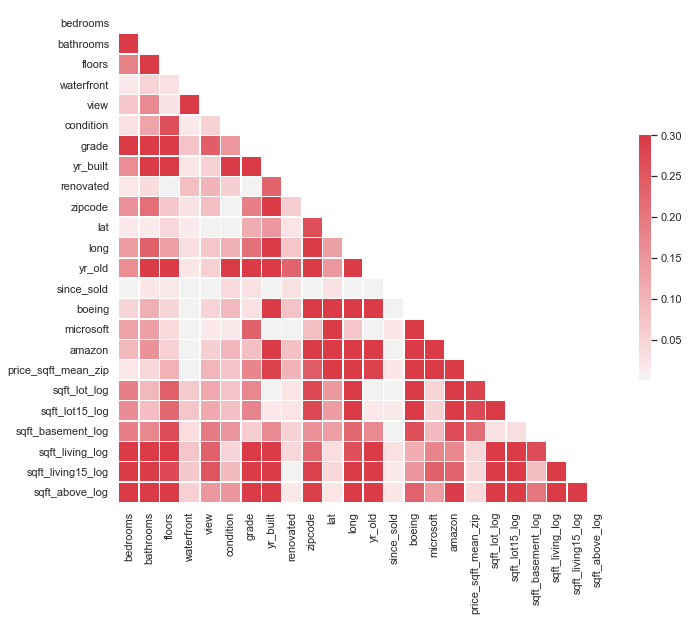

In [287]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [288]:
len(X_train.columns)

24

In [289]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

#X_train[cols].corr().applymap(lambda x: x if abs(x)>.9 else "")

len(X_train.columns)

21

In [290]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'renovated', 'zipcode', 'lat', 'long',
       'since_sold', 'boeing', 'microsoft', 'price_sqft_mean_zip',
       'sqft_lot_log', 'sqft_basement_log', 'sqft_living_log',
       'sqft_living15_log', 'sqft_above_log'],
      dtype='object')

In [291]:
#fit the linear regression to the data
model_1 = LinearRegression().fit(X_train,y_train)
y_hat_1 = model_1.predict(X_train)
r2_1 =  r2_score(y_hat_1 , y_train)
print(f"model_1 r^2 Train: {r2_1}")


model_1 r^2 Train: 0.8662960532296908


In [292]:
# generate statistics
train_mae_1 = metrics.mean_absolute_error(y_train, y_hat_1)
train_mse_1 = metrics.mean_squared_error(y_train, y_hat_1)
train_rmse_1 = np.sqrt(metrics.mean_squared_error(y_train, y_hat_1))

print('Mean Absolute Error:', train_mae_1 )
print('Mean Squared Error:',  train_mse_1)
print('Root Mean Squared Error:' , train_rmse_1)

Mean Absolute Error: 0.13224015150700807
Mean Squared Error: 0.03183709460925302
Root Mean Squared Error: 0.17842952280733426


In [293]:
#price_std = target.std()
price_std = y_train.std()
print('Mean Absolute Error:', train_mae_1/price_std )
print('Root Mean Squared Error:' , train_rmse_1/price_std)

Mean Absolute Error: 0.2545103826603212
Root Mean Squared Error: 0.3434067914326802


In [294]:
# predict the test
y_hat_1 = model_1.predict(X_test)

Text(0, 0.5, 'Predictions')

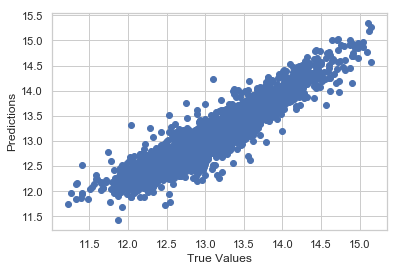

In [295]:
## The line / model
plt.scatter(y_test, y_hat_1)
plt.xlabel("True Values")
plt.ylabel("Predictions")


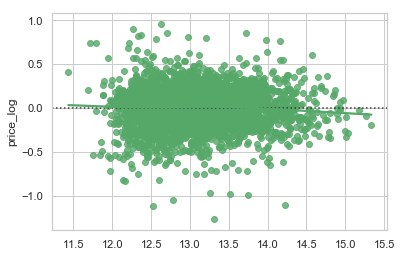

In [296]:
#plot the residuals of the model 1 test
sns.residplot(y_hat_1, y_test, lowess=True, color="g")

In [297]:
#pring r^2 for model _1 test
print(f"model_1 r^2 Test: {r2_score(model_1.predict(X_test),y_test)}")

model_1 r^2 Test: 0.8652782590050119


In [298]:
# generate statistics
test_mae_1 = metrics.mean_absolute_error(y_test, y_hat_1)
test_rmse_1 = np.sqrt(metrics.mean_squared_error(y_test, y_hat_1))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_hat_1)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_hat_1)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_hat_1))))

Mean Absolute Error:0.13693075199995838
Mean Squared Error:0.03491768736489048
Root Mean Squared Error:0.18686275007312314


In [299]:
# Find root mean squared error, standard deviation, and Train vs Test statistic
RMSE = np.sqrt(metrics.mean_squared_error(y_test, model_1.predict(X_test)))
RMSE/y_train.std()

print('Mean Absolute Error  Z:', test_mae_1/price_std )
print('Root Mean Squared Error Z:' , test_rmse_1/price_std)

print('Training: ', round(train_rmse_1,5), "vs. Testing: ", round(test_rmse_1,5))


Mean Absolute Error  Z: 0.26353794738073977
Root Mean Squared Error Z: 0.35963744357590344
Training:  0.17843 vs. Testing:  0.18686


## Model 2 - LASSO

The LASSO (Least Absolute Shrinkage and Selection Operator) is a regression method that involves penalizing the absolute size of the regression coefficients.

By penalizing (or equivalently constraining the sum of the absolute values of the estimates) you end up in a situation where some of the parameter estimates may be exactly zero. The larger the penalty applied, the further estimates are shrunk towards zero.

This is convenient when we want some automatic feature/variable selection, or when dealing with highly correlated predictors, where standard regression will usually have regression coefficients that are 'too large'.

In [300]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()

In [301]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [302]:
len(X_train.columns), len(X_test.columns)

(21, 21)

In [303]:
feature_columns = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','renovated','zipcode','lat','long','since_sold','boeing','microsoft','sqft_lot_log','sqft_above_log','sqft_basement_log','sqft_living_log','sqft_living15_log','price_sqft_mean_zip']

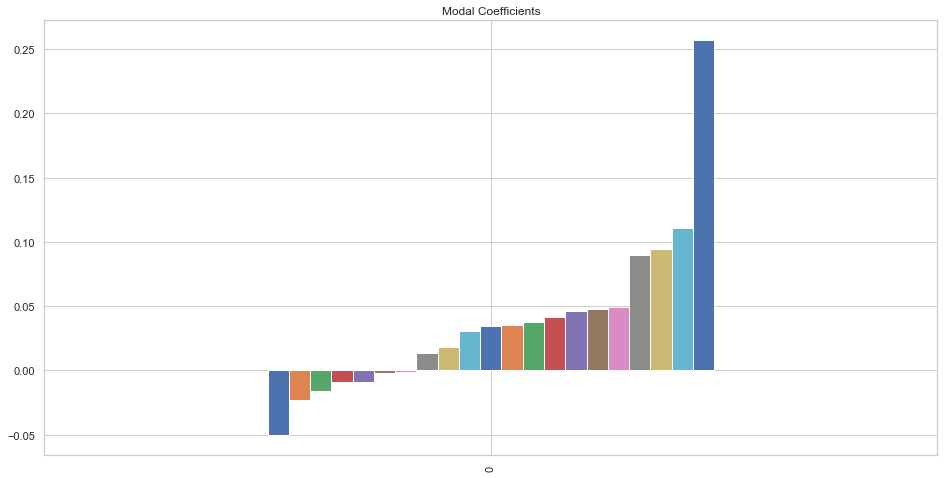

In [304]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = feature_columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [310]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_2 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_2) )
print('Testing Error: '+ str(test_rmse_2) )

Training Error: 0.13433976980200663
Testing Error: 0.18977363767646094


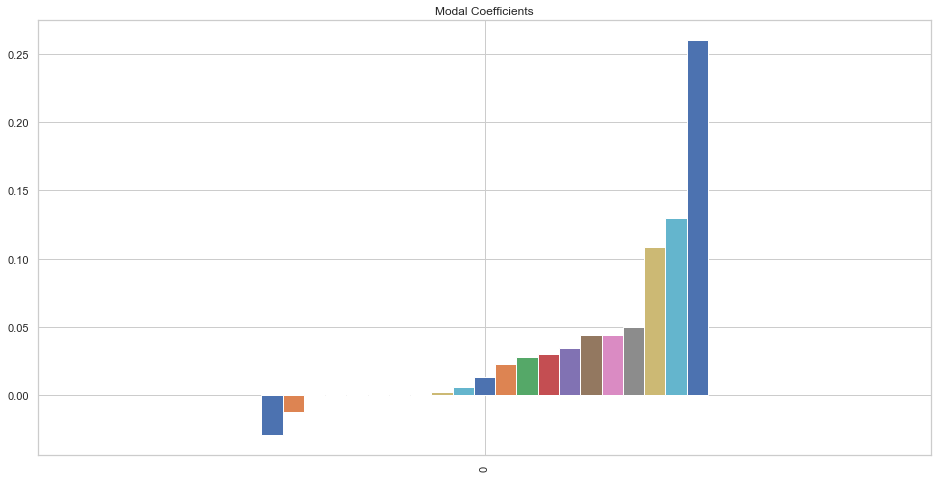

In [306]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [307]:

lasso_coef01.T

,0
microsoft,-0.029346
since_sold,-0.011976
bedrooms,-0.000000
floors,-0.000000
sqft_basement_log,0.000000
boeing,-0.000000
yr_built,-0.000000
zipcode,-0.000000
long,0.002631
renovated,0.006237


Training Error: 0.19121119196529512
Testing Error: 0.2587042553314309


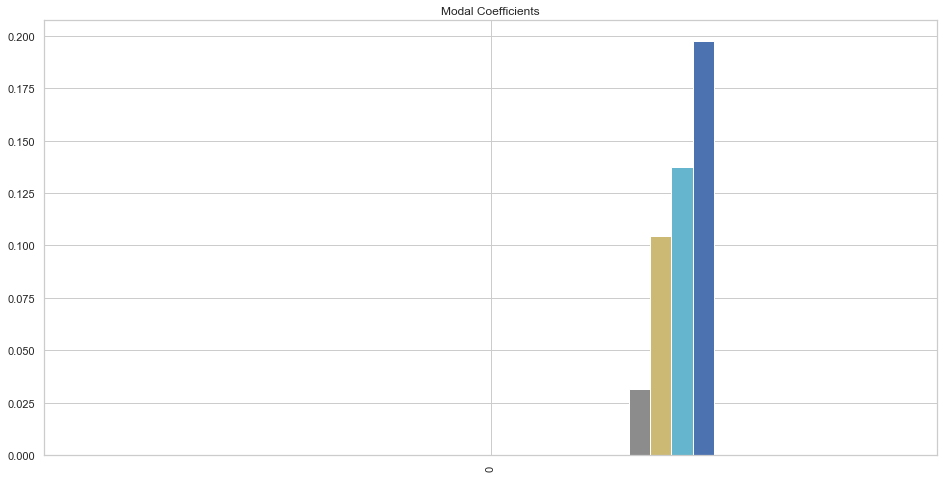

In [311]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_3 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_3) )
print('Testing Error: '+ str(test_rmse_3) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [309]:
lasso_coef01.T

,0
bedrooms,0.000000
sqft_basement_log,0.000000
sqft_lot_log,0.000000
microsoft,-0.000000
boeing,-0.000000
since_sold,-0.000000
long,0.000000
zipcode,-0.000000
lat,0.000000
yr_built,-0.000000


# Comparing our Training Error and Test Error across models

In [313]:
errors = [[train_rmse_base, test_rmse_base], 
[ train_rmse_1, test_rmse_1],
[ train_rmse_2, test_rmse_2],
[ train_rmse_3, test_rmse_3]]

In [315]:
df_error = pd.DataFrame(errors,index=[1,2,3,4],  columns=['train_error', 'test_error'])

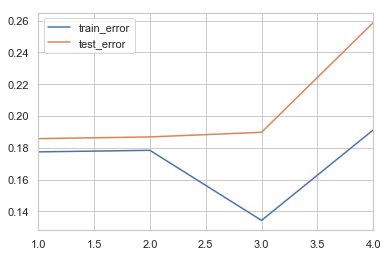

In [316]:
df_error.plot.line()

In [ ]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

In [ ]:

#fit the linear regression to the data
basemodel = LinearRegression().fit(X_train,y_train)
base_y_hat = basemodel.predict(X_train)
base_r2 =  r2_score(base_y_hat , y_train)
print(f"base_model r^2 Train: {base_r2}")

# generate statistics
train_mae = metrics.mean_absolute_error(y_train, base_y_hat)
train_mse = metrics.mean_squared_error(y_train, base_y_hat)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, base_y_hat))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

#price_std = target.std()
price_std = y_train.std()
print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

# predict the test
base_y_hat = basemodel.predict(X_test)

## The line / model
plt.scatter(y_test, base_y_hat)
plt.xlabel("True Values")
plt.ylabel("Predictions")

sns.residplot(base_y_hat, y_test, lowess=True, color="g")

print(f"base_model r^2 Test: {r2_score(basemodel.predict(X_test),y_test)}")

# generate statistics
test_mae = metrics.mean_absolute_error(y_test, base_y_hat)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, base_y_hat))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, base_y_hat)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, base_y_hat)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, base_y_hat))))

# Find root mean squared error and standard deviation
RMSE = np.sqrt(metrics.mean_squared_error(y_test, basemodel.predict(X_test)))
RMSE/y_train.std()

print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

print('Training: ', round(train_rmse,5), "vs. Testing: ", round(test_rmse,5))


In [133]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)    

SelectKBest(k=10, score_func=<function f_regression at 0x1a1c7de7b8>)

In [134]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [135]:
list(removed_columns)

['waterfront',
 'condition',
 'yr_built',
 'renovated',
 'zipcode',
 'long',
 'since_sold',
 'boeing',
 'sqft_lot_log',
 'sqft_lot15_log',
 'sqft_basement_log']

In [136]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'floors',
 'view',
 'grade',
 'lat',
 'microsoft',
 'sqft_living_log',
 'sqft_living15_log',
 'sqft_above_log']

In [ ]:
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [139]:
#fit the linear regression to the data
basemodel = LinearRegression().fit(X_train,y_train)
base_y_hat = basemodel.predict(X_train)
base_r2 =  r2_score(base_y_hat , y_train)
print(f"base_model r^2 Train: {base_r2}")

base_model r^2 Train: 0.7545404538873803


In [137]:
X_train.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,renovated,zipcode,lat,long,since_sold,boeing,microsoft,sqft_lot_log,sqft_lot15_log,sqft_basement_log,sqft_living_log,sqft_living15_log,sqft_above_log
0,-1.503395,-0.795328,0.938285,-0.086023,-0.30656,-0.631883,0.294606,1.189443,-0.211717,0.522423,0.131261,-1.382824,0.688915,-0.540475,0.703778,-2.046692,-2.239517,0.958189,-0.874545,-1.053448,-0.871451
1,0.694313,-0.469802,-0.910215,-0.086023,-0.30656,0.906285,-0.558714,0.270355,-0.211717,-0.373406,-0.952395,0.469974,-1.451558,0.452092,0.120029,-0.105505,0.152946,1.255667,-0.177652,-0.079734,-0.956690
2,-1.503395,-1.446379,-0.910215,-0.086023,-0.30656,0.906285,-1.412033,-0.784893,-0.211717,-1.418541,-1.857483,-0.083736,0.688915,1.211743,1.537336,-0.492117,-0.219633,-0.803162,-1.465088,-1.367275,-1.090660
3,1.793167,0.506775,-0.910215,-0.086023,-0.30656,0.906285,0.294606,0.440557,-0.211717,-0.354743,-0.617578,0.519666,-1.451558,0.179173,-0.367570,0.274943,0.372944,1.367879,0.660094,0.440205,-0.331758
4,-0.404541,0.506775,0.938285,-0.086023,-0.30656,-0.631883,0.294606,1.087322,-0.211717,-0.354743,-0.544854,0.533864,-1.451558,0.130200,-0.472805,0.024188,-0.175587,-0.803162,0.316575,0.537073,0.678755
